<a href="https://colab.research.google.com/github/abuwildanm/Heart-Disease/blob/master/Heart_Disease_Copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Diagnosis
---

### Authors:
1. Abu Wildan Mucholladin
2. Haekal Rizky Yulianto
3. Vincent Junitio Ungu

## Introduction
---



In the field of healthcare, Machine Learning is widely used in various fields of science like to identify the rare diseases, understanding the patterns to predict a rare disease and so on. According to the survey conducted by World Health Organization, 17.9 million total global deaths occur due to heart attacks and strokes in 2016 [[1](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))]. The application of algorithms and interpretation of the patterns can be helpful in saving numerous people lives by anticipating the condition of the disease in advance. This project is focused on determining whether the patient has a heart disease or not by taking into consideration the UCI dataset. The dataset originally contained seventy six attributes which were collected from four different databases and fourteen attributes are used for this project [[2](https://www.kaggle.com/ronitf/heart-disease-uci)].

## Import Libraries and Tools

In [1]:
# Import standard library
import numpy as np
import pandas as pd

# Import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.neural_network import MLPClassifier

# Import visualization library
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import cufflinks as cf
cf.go_offline()

import IPython
# Plotly Configuration
# Ref : https://stackoverflow.com/questions/47230817/plotly-notebook-mode-with-google-colaboratory
def configure_plotly_browser_state():
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))
IPython.get_ipython().events.register('pre_run_cell', configure_plotly_browser_state)

## Dataset Description
Taken from Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

---

### Attribute Information:

1. **age**: the patient's age in years
2. **sex**: the patient's gender (1=male; 0=female)
3. **cp**: chest pain type (4 values)
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
4. **trestbps**: the patient's resting blood pressure (mm Hg on admission to the hospital)
5. **chol**: the patient's cholesterol measurement in mg/dl
6. **fbs**: the patient's fasting blood sugar (> 120 mg/dl, 1=true; 0=false)
7. **restecg**: resting electrocardiographic results (3 values)
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: the patient's maximum heart rate achieved
9. **exang**: exercise induced angina (1=yes; 0=no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment (3 values)
    - Value 1: upsloping
    - Value 2: flat
    - Value 3: downsloping
12. **ca**: number of major vessels (0-3) colored by flourosopy
13. **thal**: a blood disorder called thalassemia (3=normal; 6=fixed defect; 7=reversable defect)
14. **target**: heart disease (0=no; 1=yes)

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/abuwildanm/Heart-Disease/master/heart.csv')
df = data.copy()
data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [3]:
feature_discrete = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
feature_continuous = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

We separate the discrete and continuous features to make it easier to do the analysis. We will do the analysis using the 'data' variable and preprocessing & modeling using the 'df' variable

In [4]:
data.head()

age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3   56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4   57    0   0       120   354    0  ...      1      0.6      2   0     2       1

[5 rows x 14 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


We get information that the dataset has 303 entries and 14 attributes (13 features & 1 target)

In [6]:
data.describe()

age         sex          cp  ...          ca        thal      target
count  303.000000  303.000000  303.000000  ...  303.000000  303.000000  303.000000
mean    54.366337    0.683168    0.966997  ...    0.729373    2.313531    0.544554
std      9.082101    0.466011    1.032052  ...    1.022606    0.612277    0.498835
min     29.000000    0.000000    0.000000  ...    0.000000    0.000000    0.000000
25%     47.500000    0.000000    0.000000  ...    0.000000    2.000000    0.000000
50%     55.000000    1.000000    1.000000  ...    0.000000    2.000000    1.000000
75%     61.000000    1.000000    2.000000  ...    1.000000    3.000000    1.000000
max     77.000000    1.000000    3.000000  ...    4.000000    3.000000    1.000000

[8 rows x 14 columns]

### Hypothesis
---

To avoid [HARKing](https://journals.sagepub.com/doi/abs/10.1207/s15327957pspr0203_4) (or Hypothesizing After the Results are Known) let's take a look at online guides on how heart disease is diagnosed, and look up some of the terms above.

**Diagnosis**: The diagnosis of heart disease is done on a combination of clinical signs and test results. The types of tests run will be chosen on the basis of what the physician thinks is going on [[1](https://www.mayoclinic.org/diseases-conditions/heart-disease/diagnosis-treatment/drc-20353124)], ranging from electrocardiograms and cardiac computerized tomography (CT) scans, to blood tests and exercise stress tests [[2](https://www.heartfoundation.org.au/your-heart/living-with-heart-disease/medical-tests)].

Looking at information of heart disease risk factors led us to the following: **high cholesterol, high blood pressure, diabetes, weight, family history and smoking** [[3](https://www.bhf.org.uk/informationsupport/risk-factors)]. According to another source [[4](https://www.heart.org/en/health-topics/heart-attack/understand-your-risks-to-prevent-a-heart-attack)], the major factors that can't be changed are: **increasing age, male gender and heredity**. Note that thalassemia, one of the variables in this dataset, is heredity. Major factors that can be modified are: **Smoking, high cholesterol, high blood pressure, physical inactivity, and being overweight and having diabetes**. Other factors include **stress, alcohol and poor diet/nutrition**.

We can see no reference to the 'number of major vessels', but given that the definition of heart disease is **"...what happens when your heart's blood supply is blocked or interrupted by a build-up of fatty substances in the coronary arteries"**, it seems logical the more major vessels is a good thing, and therefore will reduce the probability of heart disease.

Given the above, we would hypothesis that, if the model has some predictive ability, we'll see these factors standing out as the most important.

## Exploratory Data Analysis

### Data Manipulation

In [7]:
data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 
                'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 
                'max_heart_rate_achieved', 'exercise_induced_angina', 
                'st_depression', 'st_slope', 'num_major_vessels', 
                'thalassemia', 'target']

col_discrete = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 
                'exercise_induced_angina', 'st_slope', 'num_major_vessels', 
                'thalassemia']
col_continuous = ['age', 'resting_blood_pressure', 'cholesterol', 
                  'max_heart_rate_achieved', 'st_depression']

Changing the name of the column aims to facilitate the analysis and interpretation of data

In [8]:
data = data[data['thalassemia'] > 0]
data.reset_index(drop=True, inplace=True)
df = df[df['thal'] > 0]
df.reset_index(drop=True, inplace=True)

Data with the **thalassemia** attribute of 0 will be discarded, because it does not represent any value (as described in the dataset description)

In [9]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 0] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 1] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/dl'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/dl'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 0] = 'upsloping'
data['st_slope'][data['st_slope'] == 1] = 'flat'
data['st_slope'][data['st_slope'] == 2] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

Each value of the discrete attribute will be replaced by a value that more explains the purpose. This will make it easier to represent data in visual form

In [10]:
df['sex'] = df['sex'].astype('object')
df['cp'] = df['cp'].astype('object')
df['fbs'] = df['fbs'].astype('object')
df['restecg'] = df['restecg'].astype('object')
df['exang'] = df['exang'].astype('object')
df['slope'] = df['slope'].astype('object')
df['ca'] = df['ca'].astype('object')
df['thal'] = df['thal'].astype('object')

Changing data types is just to make it easier to create dummy variables from discrete attributes

### Data Distribution

In [11]:
data[col_discrete].iplot(kind='hist', subplots=True, title='Discrete Attribute Distribution')

**Discrete Attribute Description**:
1. **The number of male patients is greater than female patients**
2. **Most patients suffer from typical angina chest pain type**. Angina pectoris or typical angina is the discomfort that is noted when the heart does not get enough blood or oxygen. Typical angina is usually defined with the following [characteristics](https://www.textbookofcardiology.org/wiki/Chest_Pain_/_Angina_Pectoris):
    - Substernal chest discomfort of characteristic quality and duration
    - Provoked by exertion or emotional stress
    - Relieved by rest and/or nitroglycerine
    
   For atypical angina or non-anginal pain only show 2 or 1 of these characteristics. Asymptomatic means not showing any symptoms
3. [Fasting blood sugar test](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451) is a test carried out to measure blood sugar after an overnight fast. If fasting blood sugar level lower than 120 mg/dL is normal, but if it's higher than 120 mg/dL on two separate tests, the patient has diabetes. From the visualization above, **most patients have a test result of less than 120 mg/dL which means that is normal**
4. The [resting electrocardiogram (ECG)](https://www.physimed.com/accueil-patients/diagnostic-techniques/resting-ecg/?lang=en) is a test that measures the electrical activity of the heart. Normally, the electric impulses cross the heart, which contracts approximately 60 – 80 times per minute at rest. Each contraction of the ventricles represents one heartbeat. From the visualization above it turns out to show a **balance** of **the number of patients who have normal and abnormal heart rates**
5. [Angina](https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373), which may also be called angina pectoris, is often described as squeezing, pressure, heaviness, tightness or pain in the chest. Angina is a type of chest pain caused by reduced blood flow to the heart. Angina is a symptom of coronary artery disease. Angina can be exercise-induced or caused by other symptoms of heart disease. In this case, **most patients experience angina that is not caused by exercise**
6. Patients who have horizontal ST segment depression of ⩽ 2 mm and **downsloping ST segment depression**, then it shows a [high probability](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/) of affected heart disease. In this case, there are so many patients who show downsloping ST depression segment that it is very likely that **many patients have heart disease**
7. It appears that the number of major vessels in most patients is 0. Of course, blood vessels are very important for humans because these can flow nutrients and oxygen throughout the body until they return to the heart. However, **when the number of major vessels is reduced due to fat, it could be causing heart disease**
8. [Thalassemia](https://www.mayoclinic.org/diseases-conditions/thalassemia/symptoms-causes/syc-20354995) is a blood disorder passed down through families (inherited) in which the body makes an abnormal form or inadequate amount of hemoglobin. Evidently, many patients suffer **fixed defect of thalassemia** where this will **increase the chances of patients affected by heart disease**

In [12]:
data[col_continuous].iplot(kind='hist', bins=10, subplots=True, title='Continuous Attribute Distribution')

**Continuous Attribute Description**:
1. Most patients are in the age range of 55-59
2. [Diastolic (resting) blood pressure](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings) indicates how much pressure the blood is exerting against artery walls while the heart is resting between beats. When a person has a diastolic blood pressure of more than 80 mm Hg, it indicates that the person has high blood pressure (hypertension). It appears that **a lot of patients have high blood pressure** so it shows that there are **many patients who have a risk of heart disease**
3. A [cholesterol test](https://www.mayoclinic.org/tests-procedures/cholesterol-test/about/pac-20384601) can help determine the risk of the buildup of plaques in arteries that can lead to narrowed or blocked arteries throughout the body (atherosclerosis). Total cholesterol levels 125-200 milligrams per deciliter (mg/dL) are considered healthy for adults. When total cholesterol higher than 200 mg/dL, that is considered high. In the graph above it can be seen that **a lot of patients have high cholesterol levels so this increases the risk of heart disease**
4. [Max heart rate](https://www.heart.org/en/healthy-living/fitness/fitness-basics/target-heart-rates) is the average maximum number of times the heart should beat per minute during exercise. It can be calculated by subtracting the patient's age from 220. For example, if a patient 45 years old, subtract 45 from 220 to get a maximum heart rate of 175. If the patient heart rate is too high, then the patient straining. If it’s too low, then the intensity feels “light” to “moderate”.
5. Patients who have horizontal **ST segment depression of ⩽ 2 mm** and downsloping ST segment depression, then it shows a [high probability](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1123032/) of affected heart disease. In this case, there are so many patients who show ST segment depression of ⩽ 2 mm that it is very likely that **many patients have heart disease**

In [13]:
data['target'].iplot(kind='hist', subplots=True, title='Target Distribution')

In the graph above it can be seen that the number of patients suffering from heart disease is greater than patients who do not suffer. Of course, **this also reinforces the previous arguments** which confirm the high chance for patients affected by heart disease in terms of various aspects

### Discrete Attribute

In [171]:
def plot_discrete(variable, term):
    cross_table = pd.crosstab(data['target'], data[variable])

    lab = cross_table.columns
    val_no = cross_table.loc[0]
    val_yes = cross_table.loc[1]

    pie_no = go.Pie(labels=lab, values=val_no, name='No')
    pie_yes = go.Pie(labels=lab, values=val_yes, name='Yes')

    fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
    fig.add_trace(pie_no, row=1, col=1)
    fig.add_trace(pie_yes, row=1, col=2)
    fig.update_traces(hoverinfo='label+value+text', hole=.5)
    fig.update_layout(title_text='The number of heart disease diagnosis in terms of ' + term,
                      annotations=[dict(text='No', x=0.20, y=0.5, font_size=20, showarrow=False),
                                   dict(text='Yes', x=0.80, y=0.5, font_size=20, showarrow=False)])
    fig.show()

In [172]:
plot_discrete('sex', 'Gender')

In the graph above it is found that male patients suffer more heart disease than female patients. This certainly also reinforces the initial hypothesis which states that a man is more at risk of heart disease

In [173]:
plot_discrete('chest_pain_type', 'Chest Pain Type')

This fact is quite surprising, it turns out that most patients suffering from heart disease have a non-anginal type. This contradicts the previous argument that people with heart disease usually have typical angina complaints. That means most patients only have 1 characteristic of typical angina

In [174]:
plot_discrete('fasting_blood_sugar', 'Fasting Blood Sugar')

Most patients have levels of fasting blood sugar less than 120 mg / dL which means they are not affected by diabetes. This is good because it means that patients diagnosed with heart disease reduce their chances of making the disease worse

In [175]:
plot_discrete('rest_ecg', 'Resting ECG Results')

Most patients suffering from heart disease have abnormal heart activity. This is also in line with the previous argument that someone who has abnormal heart activity might be indicated as heart disease

In [176]:
plot_discrete('exercise_induced_angina', 'Exercise Induced Angina')

Most patients suffering from heart disease actually experience angina that is not caused by exercise. It turns out that patients who don't suffer from heart disease are the ones who experience the most angina caused by exercise

In [177]:
plot_discrete('st_slope', 'the slope of the peak exercise ST segment')

In the previous argument, it was stated that patients who have downsloping ST segment depression, thus have a high likelihood of developing heart disease. This is in line with the facts presented in the graph above

In [178]:
plot_discrete('num_major_vessels', 'Number of Major Vessels')

Logically and the arguments stated earlier, of course if the patient has a large number of major vessels, the possibility of heart disease will be small. This is in line with the facts found in the graph above

In [179]:
plot_discrete('thalassemia', 'Thalassemia')

The patients who have thalassemia certainly have a high potential for heart disease. This is also proven in the arguments stated earlier and the facts found above

### Continuous Attribute

In [104]:
def plot_continuous(variable, term):
    no = data[data['target'] == 0]
    yes = data[data['target'] == 1]

    histN = go.Histogram(x=no[variable], name='No', nbinsx=10)
    histY = go.Histogram(x=yes[variable], name='Yes', nbinsx=10)

    fig = make_subplots(rows=1, cols=2, x_title=term, y_title='Frequency')
    fig.add_trace(histN, row=1, col=1)
    fig.add_trace(histY, row=1, col=2)
    fig.update_layout(title_text='Histogram of Patient ' + term, bargap=0.1)
    fig.show()

In [105]:
plot_continuous('age', 'Age')

In [106]:
plot_continuous('resting_blood_pressure', 'Resting Blood Pressure')

In [107]:
plot_continuous('cholesterol', 'Cholesterol')

In [108]:
plot_continuous('max_heart_rate_achieved', 'Maximum Heart Rate')

In [109]:
plot_continuous('st_depression', 'ST Depression')

### Attribute Correlation

In [24]:
# Pearson Product Correlation
corr = data.corr()

hm = go.Heatmap(z=corr, x=corr.index, y=corr.columns, colorscale='RdBu', reversescale=True)
layout = go.Layout(title='Correlation Heatmap')
fig = go.Figure(data=hm, layout=layout)
fig.show()

In [25]:
corr['target'].sort_values(ascending = False)

target                     1.000000
max_heart_rate_achieved    0.430447
cholesterol               -0.086861
resting_blood_pressure    -0.145564
age                       -0.226722
num_major_vessels         -0.394139
st_depression             -0.430131
Name: target, dtype: float64

Interpretation of correlation coefficient

- The correlation coefficient ranges from -1 to +1.


- When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is no variable which has strong positive correlation with target variable.


- When it is clsoe to -1, it means that there is a strong negative correlation. So, we can see that there is no variable which has strong negative correlation with target variable.


- When it is close to 0, it means that there is no correlation. So, there is no correlation between target and fbs.


- However, We can see that the **max_heart_rate_achieved** are mildly positively correlated with target variable. 

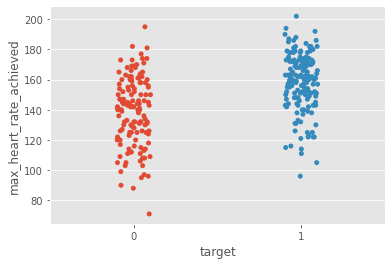

In [26]:
sns.stripplot(x="target", y="max_heart_rate_achieved", data=data)
plt.show()

Interpretation

We can see that those people suffering from heart disease (**target** = 1) have relatively higher heart rate (**max_heart_rate_achieved**) as compared to people who are not suffering from heart disease (**target** = 0).

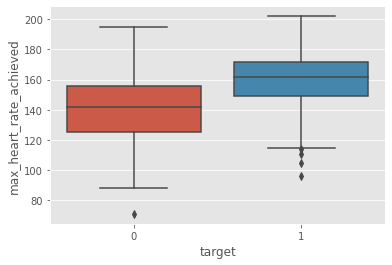

In [27]:
sns.boxplot(x="target", y="max_heart_rate_achieved", data=data)
plt.show()

## Preprocessing

### Duplication Check

In [28]:
df[df.duplicated(keep=False)]

age sex cp  trestbps  chol fbs  ... exang  oldpeak slope  ca thal target
162   38   1  2       138   175   0  ...     0      0.0     2   4    2      1
163   38   1  2       138   175   0  ...     0      0.0     2   4    2      1

[2 rows x 14 columns]

In [29]:
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

### Missing Values Check

In [30]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Outlier Detection

In [31]:
box = [go.Box(y=df[col], name=col) for col in df]
layout = go.Layout(title='Outlier Detection')
fig = go.Figure(data=box, layout=layout)
fig.show()

In [32]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# lowerBound = Q1 - 1.5*IQR
# upperBound = Q3 + 1.5*IQR

# original = df.copy()
# df = df[~((df.iloc[:, :-1] < lowerBound) | (df.iloc[:, :-1] > upperBound)).any(axis=1)]
# df.reset_index(drop=True, inplace=True)

# print('Data dengan outlier              : ', original.shape)
# print('Data setelah outlier dihilangkan : ', df.shape)

### Feature Scaling

In [33]:
df = pd.get_dummies(df)
target = df['target'].copy()
df.drop(columns='target', inplace=True)
df['target'] = target
df.head()

age  trestbps  chol  thalach  oldpeak  ...  ca_4  thal_1  thal_2  thal_3  target
0   63       145   233      150      2.3  ...     0       1       0       0       1
1   37       130   250      187      3.5  ...     0       0       1       0       1
2   41       130   204      172      1.4  ...     0       0       1       0       1
3   56       120   236      178      0.8  ...     0       0       1       0       1
4   57       120   354      163      0.6  ...     0       0       1       0       1

[5 rows x 30 columns]

In [34]:
mms = MinMaxScaler()
mms_df = mms.fit_transform(df[feature_continuous])
mms_df = pd.DataFrame(data=mms_df, columns=df[feature_continuous].columns)

In [35]:
mms_df.iplot(kind='hist', subplots=True, title='Min-Max Distribution')

In [36]:
ss = StandardScaler()
ss_df = ss.fit_transform(df[feature_continuous])
ss_df = pd.DataFrame(ss_df, columns=df[feature_continuous].columns)

In [37]:
ss_df.iplot(kind='hist', subplots=True, title='Z-Transform Distribution')

In [38]:
# df[feature_continuous] = mms_df.copy()
df[feature_continuous] = ss_df.copy()

## Split the data

In [39]:
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.3, stratify=df.iloc[:, -1])

## Build Models

### Support Vector Machine

In [40]:
svc = SVC()
svc.fit(x_train, y_train)
print('Train Score : ', svc.score(x_train, y_train))
print('Test Score : ', svc.score(x_test, y_test))

Train Score :  0.9142857142857143
Test Score :  0.8777777777777778


In [41]:
cvSVC = pd.DataFrame(cross_validate(svc, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvSVC

fit_time  score_time  test_score  train_score
0  0.010910    0.002322    0.900000     0.922222
1  0.008809    0.001517    0.833333     0.918519
2  0.005539    0.001317    0.866667     0.925926
3  0.005831    0.001379    0.966667     0.929630
4  0.006016    0.001338    0.833333     0.925926
5  0.005424    0.001323    0.800000     0.933333
6  0.007502    0.001946    0.866667     0.929630
7  0.005570    0.001326    0.833333     0.929630
8  0.005372    0.001481    0.766667     0.944444
9  0.005939    0.001436    0.766667     0.937037

In [42]:
cvSVC.mean()

fit_time       0.006691
score_time     0.001538
test_score     0.843333
train_score    0.929630
dtype: float64

### Random Forest

In [43]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
print('Train Score : ', rf.score(x_train, y_train))
print('Test Score : ', rf.score(x_test, y_test))

Train Score :  1.0
Test Score :  0.8444444444444444


In [44]:
cvRF = pd.DataFrame(cross_validate(rf, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvRF

fit_time  score_time  test_score  train_score
0  0.147118    0.008541    0.900000          1.0
1  0.139967    0.008563    0.766667          1.0
2  0.138635    0.008515    0.866667          1.0
3  0.137473    0.009092    0.933333          1.0
4  0.136235    0.008522    0.833333          1.0
5  0.151663    0.008465    0.833333          1.0
6  0.136225    0.008739    0.633333          1.0
7  0.143039    0.008470    0.866667          1.0
8  0.136828    0.008512    0.766667          1.0
9  0.134895    0.008650    0.800000          1.0

In [45]:
cvRF.mean()

fit_time       0.140208
score_time     0.008607
test_score     0.820000
train_score    1.000000
dtype: float64

### Multi Layer Perceptron

In [46]:
mlp = MLPClassifier()
mlp.fit(x_train, y_train)
print('Train Score : ', mlp.score(x_train, y_train))
print('Test Score : ', mlp.score(x_test, y_test))

Train Score :  0.9047619047619048
Test Score :  0.8666666666666667


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [47]:
cvMLP = pd.DataFrame(cross_validate(mlp, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvMLP

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

fit_time  score_time  test_score  train_score
0  0.473754    0.002432    0.900000     0.944444
1  0.483800    0.002325    0.833333     0.962963
2  0.481779    0.002404    0.833333     0.955556
3  0.467000    0.002385    0.833333     0.962963
4  0.478634    0.002358    0.900000     0.951852
5  0.477871    0.002439    0.800000     0.962963
6  0.473483    0.002404    0.800000     0.959259
7  0.490022    0.002412    0.833333     0.955556
8  0.475996    0.002480    0.766667     0.959259
9  0.484347    0.002475    0.766667     0.951852

In [48]:
cvMLP.mean()

fit_time       0.478669
score_time     0.002411
test_score     0.826667
train_score    0.956667
dtype: float64

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10,shuffle=True,random_state=0)

KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(x_train, y_train)
print('Train Score : ', KNN.score(x_train, y_train))
print('Test Score : ', KNN.score(x_test, y_test))

Train Score :  0.8380952380952381
Test Score :  0.8777777777777778


In [50]:
cvKNN = pd.DataFrame(cross_validate(KNN, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvKNN

fit_time  score_time  test_score  train_score
0  0.003988    0.004101    0.900000     0.855556
1  0.003349    0.003567    0.800000     0.862963
2  0.003050    0.003299    0.833333     0.851852
3  0.003115    0.003513    0.966667     0.844444
4  0.002758    0.003047    0.900000     0.848148
5  0.002505    0.002859    0.733333     0.866667
6  0.003002    0.003365    0.866667     0.855556
7  0.002757    0.003057    0.866667     0.851852
8  0.002515    0.002855    0.766667     0.862963
9  0.002500    0.002928    0.800000     0.855556

In [51]:
cvKNN.mean()

fit_time       0.002954
score_time     0.003259
test_score     0.843333
train_score    0.855556
dtype: float64

### Naive Bayes

In [52]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(x_train, y_train)
print('Train Score : ', nb.score(x_train, y_train))
print('Test Score : ', nb.score(x_test, y_test))

Train Score :  0.8333333333333334
Test Score :  0.8555555555555555


In [53]:
cvnb = pd.DataFrame(cross_validate(nb, df.iloc[:, :-1], df.iloc[:, -1], cv=10, return_train_score=True))
cvnb

fit_time  score_time  test_score  train_score
0  0.003719    0.001475    0.833333     0.844444
1  0.002274    0.001092    0.800000     0.833333
2  0.002204    0.001124    0.833333     0.851852
3  0.002289    0.001123    0.900000     0.829630
4  0.002209    0.001081    0.833333     0.859259
5  0.002161    0.001129    0.833333     0.848148
6  0.002165    0.001078    0.633333     0.755556
7  0.002162    0.001077    0.900000     0.844444
8  0.002277    0.001142    0.733333     0.814815
9  0.002236    0.001113    0.800000     0.851852

In [54]:
cvnb.mean()

fit_time       0.002370
score_time     0.001143
test_score     0.810000
train_score    0.833333
dtype: float64

### Keras Neural Network

In [55]:
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.constraints import MaxNorm

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action = 'ignore', category = FutureWarning)

#### Hyperparameter Tuning

In [56]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [57]:
# split into input (X) and output (Y) variables
X = x_train
Y = y_train

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

##### Batch Size and Number of Epoch

The **batch size** in iterative gradient descent is the number of patterns shown to the network before the weights are updated. It is also an optimization in the training of the network, defining how many patterns to read at a time and keep in memory.

The number of **epochs** is the number of times that the entire training dataset is shown to the network during training.

In [58]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(activation = "relu", 
                    input_dim = X.shape[1], 
                    units = 12))
    model.add(Dense(activation = "sigmoid", units = 1))
    
    # Compile model
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = 'adam', 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn = create_model, verbose = 0)

# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size = batch_size, epochs = epochs)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

be = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Best: 0.838095 using {'batch_size': 60, 'epochs': 100}
0.771429 (0.011664) with: {'batch_size': 10, 'epochs': 10}
0.814286 (0.050843) with: {'batch_size': 10, 'epochs': 50}
0.814286 (0.058321) with: {'batch_size': 10, 'epochs': 100}
0.695238 (0.058709) with: {'batch_size': 20, 'epochs': 10}
0.809524 (0.029354) with: {'batch_size': 20, 'epochs': 50}
0.819048 (0.040963) with: {'batch_size': 20, 'epochs': 100}
0.657143 (0.042056) with: {'batch_size': 40, 'epochs': 10}
0.828571 (0.011664) with: {'batch_size': 40, 'epochs': 50}
0.814286 (0.040406) with: {'batch_size': 40, 'epochs': 100}
0.595238 (0.052597) with: {'batch_size': 60, 'epochs': 10}
0.814286 (0.042056) with: {'batch_size': 60, 'epochs': 50}
0.838095 (0.055123) with: {'batch_size': 60, 'epochs': 100}
0.509524 (0.139158) with: {'batch_size': 80, 'epochs': 10}

##### Training Optimization Algorithm

We will tune the **optimization algorithm** used to **train the network**, each with default parameters.

In [59]:
# Function to create model, required for KerasClassifier
def create_model(optimizer = 'adam'):
    # create model
    model = Sequential()
    model.add(Dense(activation = "relu", 
                    input_dim = X.shape[1], 
                    units = 12))
    model.add(Dense(activation = "sigmoid", units = 1))
    
    # Compile model
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = optimizer, 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn = create_model, epochs=be.get('epochs'), batch_size = be.get('batch_size'), verbose = 0)

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer = optimizer)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

op = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.828571 using {'optimizer': 'RMSprop'}
0.738095 (0.064242) with: {'optimizer': 'SGD'}
0.828571 (0.020203) with: {'optimizer': 'RMSprop'}
0.638095 (0.068346) with: {'optimizer': 'Adagrad'}
0.461905 (0.115077) with: {'optimizer': 'Adadelta'}
0.809524 (0.033672) with: {'optimizer': 'Adam'}
0.761905 (0.026937) with: {'optimizer': 'Adamax'}
0.823810 (0.044160) with: {'optimizer': 'Nadam'}


##### Network Weight Initialization

We will look at tuning the selection of **network weight initialization** by evaluating all of the available techniques.

In [60]:
# Function to create model, required for KerasClassifier
def create_model(init_mode = 'uniform'):
    # create model
    model = Sequential()
    model.add(Dense(activation = "relu", 
                    input_dim = X.shape[1], 
                    units = 12, 
                    kernel_initializer = init_mode))
    model.add(Dense(activation = "sigmoid", units = 1))
    
    # Compile model
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = op.get('optimizer'), 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs=be.get('epochs'), batch_size = be.get('batch_size'), verbose = 0)

# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode = init_mode)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ki = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833333 using {'init_mode': 'glorot_uniform'}
0.828571 (0.030861) with: {'init_mode': 'uniform'}
0.833333 (0.026937) with: {'init_mode': 'lecun_uniform'}
0.833333 (0.048562) with: {'init_mode': 'normal'}
0.542857 (0.020203) with: {'init_mode': 'zero'}
0.819048 (0.017817) with: {'init_mode': 'glorot_normal'}
0.833333 (0.052597) with: {'init_mode': 'glorot_uniform'}
0.809524 (0.047140) with: {'init_mode': 'he_normal'}
0.823810 (0.029354) with: {'init_mode': 'he_uniform'}


##### Neuron Activation Function

The **activation function** controls the non-linearity of individual neurons and when to fire.

Generally, the rectifier **activation function** is the most popular, but it used to be the sigmoid and the tanh functions and these functions may still be more suitable for different problems.

We will evaluate the suite of different **activation functions** available in Keras. We will only use these functions in the hidden layer, as we require a sigmoid **activation function** in the output for the binary classification problem.

In [61]:
# Function to create model, required for KerasClassifier
def create_model(activation = 'relu'):
    # create model
    model = Sequential()
    model.add(Dense(activation = activation, 
                    input_dim = X.shape[1], 
                    units = 12, 
                    kernel_initializer = ki.get('init_mode')))
    model.add(Dense(activation = "sigmoid", 
                    units = 1, 
                    kernel_initializer = 'uniform'))
    
    # Compile model
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = op.get('optimizer'), 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs = be.get('epochs'), batch_size = be.get('batch_size'), verbose = 0)

# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation = activation)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ac = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Best: 0.833333 using {'activation': 'softplus'}
0.819048 (0.040963) with: {'activation': 'softmax'}
0.833333 (0.037495) with: {'activation': 'softplus'}
0.804762 (0.026937) with: {'activation': 'softsign'}
0.804762 (0.017817) with: {'activation': 'relu'}
0.823810 (0.035635) with: {'activation': 'tanh'}
0.766667 (0.066326) with: {'activation': 'sigmoid'}
0.776190 (0.052597) with: {'activation': 'hard_sigmoid'}
0.814286 (0.030861) with: {'activation': 'linear'}


##### Dropout Regularization

We will look at tuning the **dropout** rate for regularization in an effort to limit overfitting and improve the model’s ability to generalize.

To get good results, dropout is best combined with a **weight constraint** such as the max norm constraint.

In [62]:
# Function to create model, required for KerasClassifier
def create_model(dropout_rate = 0.0, weight_constraint = 0):
    # create model
    model = Sequential()
    model.add(Dense(activation = ac.get('activation'), 
                    input_dim = X.shape[1], 
                    units = 12, 
                    kernel_initializer = ki.get('init_mode'), 
                    kernel_constraint = MaxNorm(weight_constraint)))
    model.add(Dropout(rate = dropout_rate))
    model.add(Dense(activation = "sigmoid", 
                    units = 1, 
                    kernel_initializer='uniform'))
    
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer = op.get('optimizer'), 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn = create_model, epochs = be.get('epochs'), batch_size = be.get('batch_size'), verbose = 0)

# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate = dropout_rate, weight_constraint = weight_constraint)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

dw = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.833333 using {'dropout_rate': 0.1, 'weight_constraint': 2}
0.828571 (0.034993) with: {'dropout_rate': 0.0, 'weight_constraint': 1}
0.819048 (0.052597) with: {'dropout_rate': 0.0, 'weight_constraint': 2}
0.819048 (0.040963) with: {'dropout_rate': 0.0, 'weight_constraint': 3}
0.814286 (0.042056) with: {'dropout_rate': 0.0, 'weight_constraint': 4}
0.814286 (0.034993) with: {'dropout_rate': 0.0, 'weight_constraint': 5}
0.819048 (0.037495) with: {'dropout_rate': 0.1, 'weight_constraint': 1}
0.833333 (0.017817) with: {'dropout_rate': 0.1, 'weight_constraint': 2}
0.828571 (0.042056) with: {'dropout_rate': 0.1, 'weight_constraint': 3}
0.823810 (0.040963) with: {'dropout_rate': 0.1, 'weight_constraint': 4}
0.814286 (0.023328) with: {'dropout_rate': 0.1, 'weight_constraint': 5}
0.804762 (0.026937) with: {'dropout_rate': 0.2, 'weight_constraint': 1}
0.809524 (0.024281) with: {'dropout_rate': 0.2, 'weight_constraint': 2}
0.809524 (0.026937) with: {'dropout_rate': 0.2, 'weight_constraint': 

##### Number of Neurons in the Hidden Layer 

The number of **neurons** in a layer is an important parameter to tune. Generally the number of **neurons** in a layer controls the representational capacity of the network, at least at that point in the topology.

Also, generally, a large enough single layer network can approximate any other neural network (in Theory).

In [63]:
# Function to create model, required for KerasClassifier
def create_model(neurons = 1):
    # create model
    model = Sequential()
    model.add(Dense(activation = ac.get('activation'), 
                    input_dim = X.shape[1], 
                    units = neurons, 
                    kernel_initializer = ki.get('init_mode'), 
                    kernel_constraint = MaxNorm(dw.get('weight_constraint'))))
    model.add(Dropout(rate = float(dw.get('dropout_rate'))))
    model.add(Dense(activation = "sigmoid", 
                    units = 1, 
                    kernel_initializer='uniform'))
   
    # Compile model
    model.compile(loss = 'binary_crossentropy', 
                  optimizer = op.get('optimizer'), 
                  metrics = ['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, epochs = be.get('epochs'), batch_size=be.get('batch_size'), verbose = 0)

# define the grid search parameters
neurons = [1, 5, 10, 15, 20, 25, 30]
param_grid = dict(neurons = neurons)
grid = GridSearchCV(estimator = model, param_grid = param_grid, n_jobs = -1, cv = 3)
grid_result = grid.fit(X, Y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

ne = grid_result.best_params_

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.838095 using {'neurons': 30}
0.614286 (0.111270) with: {'neurons': 1}
0.752381 (0.006734) with: {'neurons': 5}
0.814286 (0.030861) with: {'neurons': 10}
0.819048 (0.037495) with: {'neurons': 15}
0.828571 (0.030861) with: {'neurons': 20}
0.833333 (0.037495) with: {'neurons': 25}
0.838095 (0.035635) with: {'neurons': 30}


#### Build Model

Build a model using the acquired tuned hyperparameters from the above steps

In [64]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation = ac.get('activation'), 
                     input_dim = X.shape[1], 
                     units = ne.get('neurons'), 
                     kernel_initializer = ki.get('init_mode'), 
                     kernel_constraint = MaxNorm(dw.get('weight_constraint'))))

# Adding the dropout rate
classifier.add(Dropout(rate = float(dw.get('dropout_rate'))))
                     
# Adding the output layer
classifier.add(Dense(activation = "sigmoid", 
                     units = 1, 
                     kernel_initializer = "uniform"))

# Compiling the ANN
classifier.compile(optimizer = op.get('optimizer'),
                   loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

#### Fit and Validation Split of 33% Training Data

Keras can separate a portion of your training data into a validation dataset and evaluate the performance of the model on that validation dataset each epoch.

We can do this by setting the validation_split argument on the fit() function to a percentage of the size of training dataset.

For example, a reasonable value might be 0.2 or 0.33 for 20% or 33% of training data held back for validation.

In [65]:
classifier.fit(x_train, y_train,
               validation_split = 0.33,
               batch_size = be.get('batch_size'), 
               epochs = be.get('epochs'))

Train on 140 samples, validate on 70 samples
Epoch 1/100
140/140 [==============================] - 0s 1ms/sample - loss: 0.6866 - acc: 0.5929 - val_loss: 0.6799 - val_acc: 0.7571
Epoch 2/100
140/140 [==============================] - 0s 76us/sample - loss: 0.6696 - acc: 0.7571 - val_loss: 0.6741 - val_acc: 0.7000
Epoch 3/100
140/140 [==============================] - 0s 77us/sample - loss: 0.6663 - acc: 0.7357 - val_loss: 0.6691 - val_acc: 0.7143
Epoch 4/100
140/140 [==============================] - 0s 83us/sample - loss: 0.6605 - acc: 0.7286 - val_loss: 0.6643 - val_acc: 0.7286
Epoch 5/100
140/140 [==============================] - 0s 70us/sample - loss: 0.6535 - acc: 0.7429 - val_loss: 0.6596 - val_acc: 0.6714
Epoch 6/100
140/140 [==============================] - 0s 64us/sample - loss: 0.6457 - acc: 0.7571 - val_loss: 0.6560 - val_acc: 0.6714
Epoch 7/100
140/140 [==============================] - 0s 74us/sample - loss: 0.6439 - acc: 0.7214 - val_loss: 0.6514 - val_acc: 0.6714
Epoc

#### Training Summary

In [66]:
scoreTrain = classifier.evaluate(x_train, y_train)
print('Train loss :', scoreTrain[0])
print('Train accuracy :', scoreTrain[1])

210/210 [==============================] - 0s 52us/sample - loss: 0.3522 - acc: 0.8524
Train loss : 0.35216541772796994
Train accuracy : 0.85238093


#### Test Summary

In [67]:
scoreTest = classifier.evaluate(x_test, y_test)
print('Test loss :', scoreTest[0])
print('Test accuracy :', scoreTest[1])

90/90 [==============================] - 0s 66us/sample - loss: 0.3104 - acc: 0.8667
Test loss : 0.31035444339116414
Test accuracy : 0.8666667


## Model Evaluation

### Keras Neural Network

####Confusion Matrix

In [68]:
y_pred = classifier.predict(x_test)

Accuracy of the model :  0.8666666666666667


Text(0.5, 15.0, 'Predicted label')

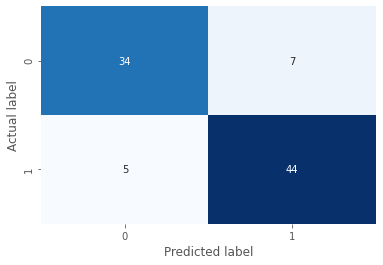

In [69]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm, annot = True, cmap = "Blues", fmt = "d",cbar = False)

#Accuracy score
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred.round())
print('Accuracy of the model : ', accuracy)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Conclusion